In [35]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [169]:
def get_data(type_data: str) -> pd.DataFrame:
    file_path = Path().parent / f'data/{type_data}.csv'

    return pd.read_csv(file_path)

In [170]:
data = get_data("train")

In [171]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print(len(train_data))
print(len(test_data))


6400
1600


In [155]:
print(train_data.head())

        id  num_rooms  num_baths  square_meters orientation  year_built  \
1467  2580        2.0        1.0          -14.0       north      1968.0   
5768  7129        1.0        1.0           97.0        west      1971.0   
5714  4083        3.0        1.0          160.0         NaN      1951.0   
1578  2551        4.0        1.0          116.0       north      2009.0   
6958  4927        1.0        2.0          165.0        west      2002.0   

         door is_furnished has_pool         neighborhood  num_crimes has_ac  \
1467  3º - 2a        False    False          Sant Andreu        10.0   True   
5768  2º - 3a        False    False  Sarrià-Sant Gervasi         0.0  False   
5714  2º - 2a         True     True           Nou Barris         4.0   True   
1578      NaN         True     True             Eixample         0.0  False   
6958  2º - 1a         True    False           Nou Barris         2.0   True   

     accepts_pets  num_supermarkets  price  
1467         True            

# 1. Data preprocessing


## Variable generation

In [172]:

#### getting floor variable from door
import re

def extract_first_number(s):
    if isinstance(s, str):  # Check if the value is a string
        match = re.match(r'^(\d{1,2})º', s)  # Match 1 or 2 digits before 'º'
        return int(match.group(1)) if match else None  # Return the extracted number
    return None  # Return None for non-string values (like NaN)


# Apply the function to the 'category' column to create a new numerical column
train_data['floor'] = train_data['door'].apply(extract_first_number)


In [157]:
print(train_data.head())

        id  num_rooms  num_baths  square_meters orientation  year_built  \
1467  2580        2.0        1.0          -14.0       north      1968.0   
5768  7129        1.0        1.0           97.0        west      1971.0   
5714  4083        3.0        1.0          160.0         NaN      1951.0   
1578  2551        4.0        1.0          116.0       north      2009.0   
6958  4927        1.0        2.0          165.0        west      2002.0   

         door is_furnished has_pool         neighborhood  num_crimes has_ac  \
1467  3º - 2a        False    False          Sant Andreu        10.0   True   
5768  2º - 3a        False    False  Sarrià-Sant Gervasi         0.0  False   
5714  2º - 2a         True     True           Nou Barris         4.0   True   
1578      NaN         True     True             Eixample         0.0  False   
6958  2º - 1a         True    False           Nou Barris         2.0   True   

     accepts_pets  num_supermarkets  price  floor  
1467         True     

In [175]:
# categorials to numerical
def preprocess_data(data):
    categorical_columns = [
        "has_pool",
        "is_furnished",
        "orientation",
        "has_ac",
        "accepts_pets",
        "neighborhood"
    ]
    
    # Check if the data is valid
    if data is None:
        raise ValueError("The input data cannot be None.")
    
    # Apply transformation
    for column in categorical_columns:
        if column not in data.columns:
            raise ValueError(f"Column '{column}' is not found in the data.")
        data[column] = to_numerical(column=data[column])
    
    return data

# Make sure train_data is properly initialized before calling preprocess_data
train_data = preprocess_data(data=train_data)

train_data = train_data.drop(columns=['door'])



In [176]:
print(train_data.head())

        id  num_rooms  num_baths  square_meters  orientation  year_built  \
1467  2580        2.0        1.0          -14.0          1.0      1968.0   
5768  7129        1.0        1.0           97.0          2.0      1971.0   
5714  4083        3.0        1.0          160.0          NaN      1951.0   
1578  2551        4.0        1.0          116.0          1.0      2009.0   
6958  4927        1.0        2.0          165.0          2.0      2002.0   

      is_furnished  has_pool  neighborhood  num_crimes  has_ac  accepts_pets  \
1467           1.0       1.0           1.0        10.0     1.0           1.0   
5768           1.0       1.0           2.0         0.0     2.0           2.0   
5714           2.0       2.0           3.0         4.0     1.0           NaN   
1578           2.0       2.0           4.0         0.0     2.0           1.0   
6958           2.0       1.0           3.0         2.0     1.0           1.0   

      num_supermarkets  price  floor  
1467               NaN 

## 1. Missing values


### 1. drop missing

In [177]:
## drop all misising

dropped_train = train_data.dropna()

dropped_train.shape

(657, 15)

### 2. impute missing with median


In [178]:
imputed_train1 = train_data.fillna(train_data.median())

### 3. Imputations with nearest neighbors

In [179]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

# Apply the KNNImputer to the DataFrame
# KNNImputer expects all columns to be numeric, so ensure there are no non-numeric columns
df_imputed2 = train_data(imputer.fit_transform(df), columns=df.columns)

# Show the DataFrame after imputation
print(df_imputed2.head())

NameError: name 'df' is not defined

## 2. Outliers

### num_rooms

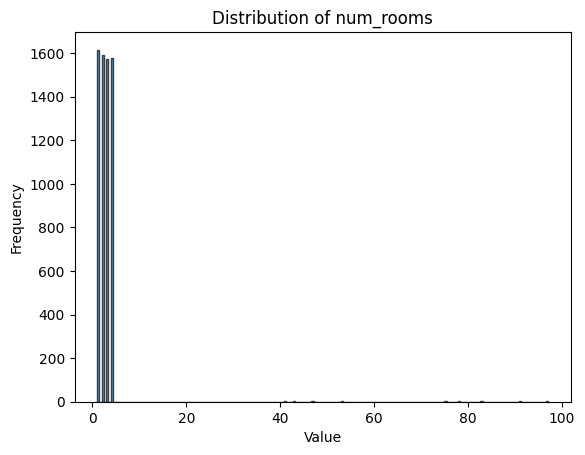

In [180]:
plt.hist(train_data['num_rooms'], bins=200, edgecolor='black', alpha=0.7)

# Add labels and show plot
plt.title('Distribution of num_rooms')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

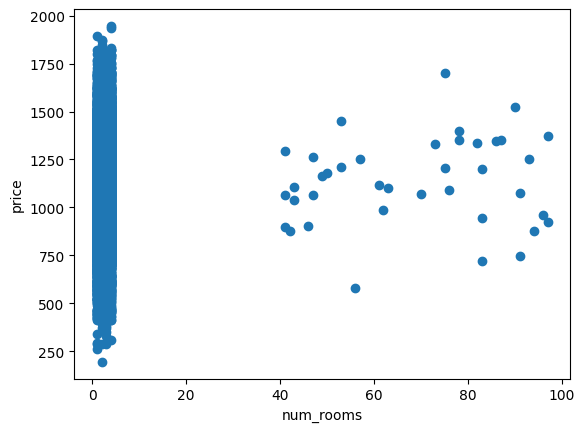

In [181]:
plt.scatter(train_data['num_rooms'], train_data['price'])
plt.xlabel('num_rooms')
plt.ylabel('price')
plt.show()

### square meters


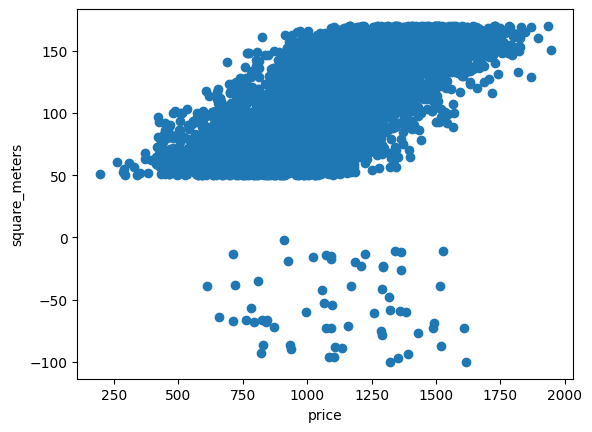

In [182]:
plt.scatter(train_data['price'], train_data['square_meters'])
plt.xlabel('price')
plt.ylabel('square_meters')
plt.show()

In [ ]:
# replace outliers with median
m = train_data.loc[train_data['num_rooms'] <= 20, 'num_rooms'].median()

# Step 2: Replace values greater than 20 with the calculated mean
train_data.loc[train_data['num_rooms'] > 20, 'num_rooms'] = mean.value

plt.scatter(train_data['num_rooms'], train_data['price'])
plt.title('after imputating mean for outliers( more than 20 rooms)')
plt.xlabel('num_rooms')
plt.ylabel('price')
plt.show()


# 2. Models

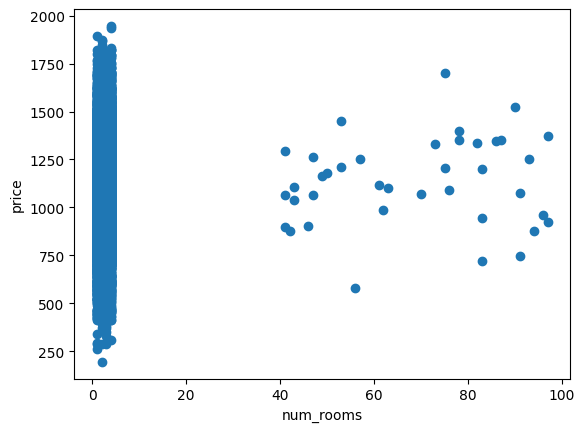

In [74]:
plt.scatter(train_data['num_rooms'], train_data['price'])
plt.xlabel('num_rooms')
plt.ylabel('price')
plt.show()

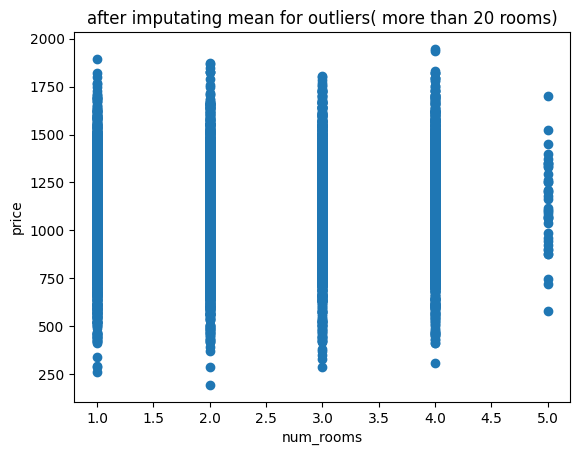

In [90]:
# handle outliers
mean_value = train_data.loc[train_data['num_rooms'] <= 20, 'num_rooms'].mean()

# Step 2: Replace values greater than 20 with the calculated mean
train_data.loc[train_data['num_rooms'] > 20, 'num_rooms'] = mean.value

plt.scatter(train_data['num_rooms'], train_data['price'])
plt.title('after imputating mean for outliers( more than 20 rooms)')
plt.xlabel('num_rooms')
plt.ylabel('price')
plt.show()


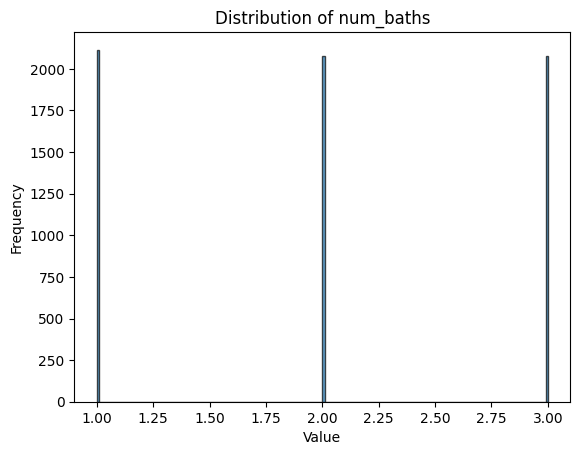

In [91]:
plt.hist(train_data['num_baths'], bins=200, edgecolor='black', alpha=0.7)

# Add labels and show plot
plt.title('Distribution of num_baths')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [92]:
count = (train_data['num_baths'] >= train_data['num_rooms']).sum()

# Output the result
print("Number of times num_baths >= num_rooms:", count)

Number of times num_baths >= num_rooms: 3154


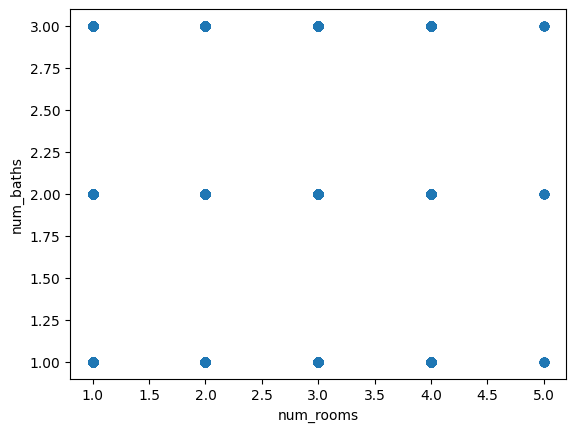

In [93]:
plt.scatter(train_data['num_rooms'], train_data['num_baths'])
plt.xlabel('num_rooms')
plt.ylabel('num_baths')
plt.show()

In [98]:
## missing values

missing_values_count = train_data['num_baths'].isna().sum()

# Output the result
print("Number of missing values in 'num_baths' column:", missing_values_count)

Number of missing values in 'num_baths' column: 133


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

# Apply the KNNImputer to the DataFrame
# KNNImputer expects all columns to be numeric, so ensure there are no non-numeric columns
df_imputed = train_data(imputer.fit_transform(df), columns=df.columns)

# Show the DataFrame after imputation
print(df_imputed)

In [94]:
def to_numerical(column: pd.Series) -> pd.Series:
    unique_values = column.dropna().unique()  
    mapping = {value: idx for idx, value in enumerate(unique_values, 1)}

    return column.map(mapping)

In [66]:
from sklearn.linear_model import LinearRegression

data = preprocess_data(data=train_data)

X = data.drop(columns=["price"])
y = data["price"]

model = LinearRegression()

model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept

id                  0
num_rooms           0
num_baths           0
square_meters       0
orientation         0
year_built          0
is_furnished        0
has_pool            0
neighborhood        0
num_crimes          0
has_ac              0
accepts_pets        0
num_supermarkets    0
price               0
door_a              0
door_b              0
dtype: int64


(array([-1.56271330e-04,  6.64678366e-01,  1.10993756e+01,  4.52462887e+00,
         1.43431042e+00, -1.24123294e-02,  2.53796479e+00,  6.97237186e+00,
        -3.23273651e-01, -2.20342069e+01, -4.08431316e+00,  1.94852680e+00,
        -4.68599598e-01,  2.94327751e+00,  6.24674719e-02]),
 np.float64(644.7123170439036))

In [67]:
from sklearn.metrics import mean_squared_error

print(len(test_data))
test_data = preprocess_data(data=test_data)
print(len(test_data))

y_pred = model.predict(test_data)

test_predictions_submit = pd.DataFrame({"id": test_data["id"], "price": y_pred})
test_predictions_submit.to_csv("test_predictions_submit.csv", index = False)

1600
id                  0
num_rooms           0
num_baths           0
square_meters       0
orientation         0
year_built          0
is_furnished        0
has_pool            0
neighborhood        0
num_crimes          0
has_ac              0
accepts_pets        0
num_supermarkets    0
price               0
door_a              0
door_b              0
dtype: int64
1600


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- price


In [68]:
# correlations

df_corr = train_data.corr()

# Plot correlations
# Remove upper triangle
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.heatmap(df_corr, annot = True)

ValueError: could not convert string to float: '3º - 2a'